# Large-Scale modeling and analysis of TCR-pMHC

#### I) VDJ -> fasta + clustering
#### II) Run TCRpMHC models on real + negative
#### III) Calculate on Rosetta + FoldX energies
#### IV) Statistics
#### V) Model Quality 

First task to do:
VDJdb -> look complete TCR (paired), check scores, download data
IMGT -> download TCR V, D, J genes and transform to fasta format 

VDJdb calculates scores in range 0 to 3 where:
0 - critical information missing, 1 - medium confidence, 2 - high confidence, 3 - very high confidence.

Initially, python structures such as dicts were used to generate the sequences. But afterwards I used pandas, much faster!

ftp://ftp.ebi.ac.uk/pub/databases/ipd/mhc/

In [1]:
import re

infile=open('SearchTable-2020-02-06 14_18_56.611.tsv','r')
#outfile=open('fastaFile_output.txt','w')
#output1=""
speciesCount=[]
complexID=""
TCR=dict()
TR=dict()
VgeneCheck=None
JgeneCheck=None
for line in infile:
    if "\t\t" in line:
        line.replace("\t\t","\t-\t")
        #print(line)
    
    
    if line[0:1].isdigit()==True:
    
        line1=line.split("\t")
        complexID=line1[0]
        TRAlist=""
        TRBlist=""
        #The TR lists is composed by Specie(5), Vgene, Jgene, CDR3, MHC-A, MHC-B, Epitope

        
        VgeneCheck=re.search("TR[AB]V\w+",line1[3])
        JgeneCheck=re.search("TR[AB]J\w+",line1[4])
        
        #if Vgene is not None:
        #if complexID=="13":
        #    print(line1[3])
        spModified=line1[5].lower()
        
        #if VgeneCheck and JgeneCheck is not None:        
        totlist=[]
        if line1[1]=="TRA":
            TRAlist=[spModified,line1[3],line1[4],line1[2],line1[6],line1[7],line1[9]] 
            TR["TRA"]=TRAlist
            #TCR[complexID]={"TRA":TRAlist}
            
            #if complexID=="13":
             #   print(TRAlist)
            
            #need to add it here, otherwise the values are not correct
        elif line1[1]=="TRB":
            TRBlist=[spModified,line1[3],line1[4],line1[2],line1[6],line1[7],line1[9]] 
            TR["TRB"]=TRBlist
            
        
        TCR[complexID]=TR
            #{"TRA":TRAlist,"TRB":TRBlist}
        
        #if line1[5] not in speciesCount:
        #    speciesCount+=line1[5]
        #    print(speciesCount)
        
#for i in TCR.keys():
#    if len(TCR[i].keys())!=2:
#        print(len(TCR[i].keys()))
    
#print(TCR["13"])

len(TCR)




21311

### Pandas DF are much easier and faser, I only need to run this!

In [3]:
import pandas as pd
import re

infile='SearchTable-2020-02-06 14_18_56.611.tsv'
df=pd.read_table(infile, sep="\t")
infile2='Jgenes_fasta_outfile'
df2=pd.read_table(infile2, sep="|",names=["Name", "Specie","Funct","0", "1","2","3","4","5","6","7","8","9","10","Seq"])
infile3='Vgenes_fasta_outfile.txt'
df3=pd.read_table(infile3, sep="|",names=["Name", "Specie","Funct","0", "1","2","3","4","5","6","7","8","9","10","Seq"])


In [4]:
df.loc[df["complex.id"]==23720]

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
506,23720,TRA,CAEYTGTASKLTF,TRAV5*01,TRAJ44*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:16237109,"{""frequency"": ""3/3"", ""identification"": ""tetram...","{""cell.subset"": ""CD8+"", ""clone.id"": ""3.1"", ""do...","{""cdr3"": ""CAEYTGTASKLTF"", ""cdr3_old"": ""CAEYTGT...",1
41984,23720,TRB,CACSLRSQGTDTQYF,TRBV30*01,NaN,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,pp65,CMV,PMID:16237109,"{""frequency"": ""3/3"", ""identification"": ""tetram...","{""cell.subset"": ""CD8+"", ""clone.id"": ""3.1"", ""do...","{""cdr3"": ""CACSLRSQGTDTQYF"", ""cdr3_old"": ""CACSL...",1


In [5]:
df4=df3.iloc[:,[0,1,14]]
sp1=df3["Specie"]
sp1
#df4[(df4["Name"]==VgeneA & df4["Specie"]==specie)].iloc[0,1]

>IMGT000049    Bos taurus_Hereford
>IMGT000049    Bos taurus_Hereford
>IMGT000049    Bos taurus_Hereford
>IMGT000049    Bos taurus_Hereford
>IMGT000049    Bos taurus_Hereford
                      ...         
>JH481615       Tursiops truncatus
>JH481615       Tursiops truncatus
>JH481615       Tursiops truncatus
>JH473572       Tursiops truncatus
>JH473572       Tursiops truncatus
Name: Specie, Length: 1023, dtype: object

## Statistics/Correlations 

In [6]:
#First drop N/A
df=df.dropna()

#Then remove the un-paired complex.id 
complex_id_list = list(set(df['complex.id']))
drops=[]
for i in complex_id_list:
    i=int(i)
    if len(df.loc[df["complex.id"]==i])!=2:
        drops.append(i)
        #df.drop(df.index[df.loc[df["complex.id"]==i].index[0]])
        
        #df.drop(df.index[i])


In [7]:
df = df[~df["complex.id"].isin(drops)]

In [9]:
#There are 21292 Vgenes in Alpha 
#and 21267 in Beta, and 25 that are not paired
#len(VgenesDFB["V"])+len(drops)
print(len(df.loc[df["Gene"]=="TRA"]))
len(df.loc[df["Gene"]=="TRB"])

21267


21267

In [21]:
dfVJA=df[(df['Gene']=='TRA')].iloc[:,[0,1,3,4]]
VgenesDFA=dfVJA.iloc[:,[2,3]]
newA = VgenesDFA["J"].copy()
df6A=VgenesDFA["V"].str.cat(newA, sep ="")
alphaVJ=df6A.value_counts()


dfVJB=df[(df['Gene']=='TRB')].iloc[:,[0,1,3,4]]
VgenesDFB=dfVJB.iloc[:,[2,3]]
newB = VgenesDFB["J"].copy()
#VgenesBeta=
df6B=VgenesDFB["V"].str.cat(newB, sep ="")
betaVJ=df6B.value_counts()

VgenesBeta=VgenesDFB["V"].copy().unique()
VgenesAlpha=VgenesDFA["V"].copy().unique()
VgenesAB=VgenesDFA["V"].str.cat(VgenesDFB["V"], sep="")
VgenesAB_counts=VgenesAB.value_counts()

result = pd.concat([alphaVJ, betaVJ], axis=1, sort=False)
#result.dropna()
alpha=dfVJA.iloc[:,[0,2]]
beta=dfVJB.iloc[:,[0,2]]
#pd.concat([alpha,beta], axis=complex.id)


/Users/s182286/opt/anaconda3/envs/myclone/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.


In [11]:
#But this is actually to construct the ones that I have, not the combinations
VJ=dict()

for row in range(0,len(VgenesDFA)-1):
    outDict=dict()
    outer_key=VgenesDFB["V"].iloc[row]
    inner_key=VgenesDFB["J"].iloc[row]
    
    if outer_key not in VJ.keys():
        outDict[inner_key]=1
        VJ[outer_key]=outDict
    else:
        if inner_key not in outDict.keys():
            outDict[inner_key]=1
        else:
            outDict[inner_key]+=1
        VJ[outer_key]=outDict
print(len(VJ))

55


### Heatmap of V vs J genes in Alpha or in Beta

The data will be normalized with KL divergence (https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810)

In [80]:
JgenesAlpha=newA.unique()
VgenesAlpha=VgenesDFA["V"].copy().unique()
count=0
geneCount=dict()
myDict=dict()
GenesV=[]
GenesJ=[]
Counts=[]
maxnum=int(alphaVJ.max())
VAcounts=VgenesDFA["V"].copy().value_counts()
JAcounts=VgenesDFA["J"].copy().value_counts()
def kl_divergence(P, Q):
    return np.sum(np.where(P != 0, P * np.log(P / Q), 0))

for V in VgenesAlpha:
    geneCount=dict()
    for J in JgenesAlpha:
        
        value=0
        concat=V+J
        if concat not in alphaVJ.keys():
            geneCount[J]=0
            myDict[V]=geneCount
            #Counts.append(0)
        else:
            
            P=(alphaVJ[concat]/tot)
            Pa=VAcounts[V]/tot
            Pb=JAcounts[J]/tot
            Q=(Pa*Pb)
            p+=P
            q+=Q
            value=kl_divergence(P,Q)
            
            geneCount[J]=value
            myDict[V]=geneCount
            
            #Counts.append(value) 
        #GenesV.append(V)
        #GenesJ.append(J)
data_VJalpha=pd.DataFrame.from_dict(myDict)

In [81]:
myDict

{'TRAV12-2*01': {'TRAJ24*02': 4.801545078236189e-05,
  'TRAJ54*01': -0.00019364180761266426,
  'TRAJ48*01': 0.0003102785432687141,
  'TRAJ52*01': -0.0004022793234528674,
  'TRAJ42*01': -0.0005780299848466867,
  'TRAJ12*01': 2.842561637126244e-05,
  'TRAJ34*01': -0.00014570498308105433,
  'TRAJ6*01': 0.0005049777628517681,
  'TRAJ37*01': -0.0007754598448312193,
  'TRAJ13*01': 0.0003983451826442274,
  'TRAJ49*01': 0.00025538303553552816,
  'TRAJ14*01': 0.00020925540942440653,
  'TRAJ10*01': 0.0005961679782109639,
  'TRAJ31*01': 0.0019650749743871476,
  'TRAJ28*01': -0.00036876594977363703,
  'TRAJ40*01': -0.0007267602353570818,
  'TRAJ18*01': 3.292838516758725e-05,
  'TRAJ45*01': 0.0023958211682509763,
  'TRAJ21*01': -0.00016816682290864428,
  'TRAJ33*01': -0.0007985772397624355,
  'TRAJ22*01': -0.00033088723701105713,
  'TRAJ43*01': 6.86314125025727e-05,
  'TRAJ41*01': 0.00023048357127440739,
  'TRAJ30*01': 0.0020890937199596745,
  'TRAJ39*01': -0.0007591658753540896,
  'TRAJ44*01': -0.

AxesSubplot(0.125,0.125;0.62x0.755)


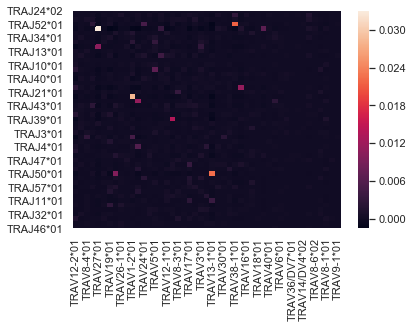

In [82]:
import seaborn as sns
print(sns.heatmap(data_VJalpha))

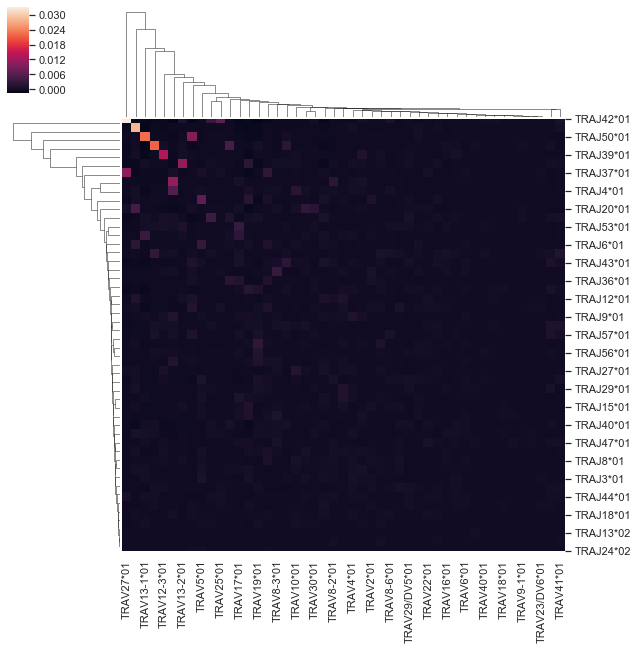

In [83]:
sns.clustermap(data_VJalpha)

AxesSubplot(0.125,0.125;0.62x0.755)


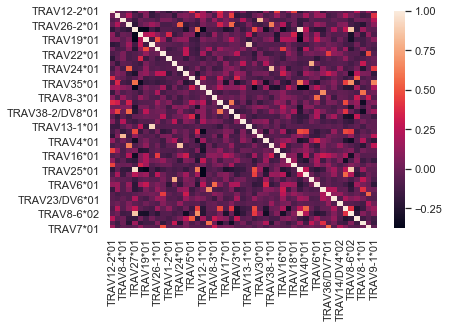

In [78]:
print(sns.heatmap(data_VJalpha.corr()))

### Heatmap of Vgenes in alpha vs Vgenes in beta

In [70]:

count=0
geneCount=dict()
myDict_AB_Vgenes=dict()
GenesV=[]
GenesJ=[]
Counts=[]
tot=VgenesAB_counts.sum()
Acounts=VgenesDFA["V"].copy().value_counts()
Bcounts=VgenesDFB["V"].copy().value_counts()
p=[]
q=[]

def kl_divergence(P, Q):
    return np.sum(np.where(P != 0, P * np.log(P / Q), 0))

for V1 in VgenesAlpha:
    geneCount=dict()
    for V2 in VgenesBeta:
        value=0
        concat=V1+V2
        if concat not in VgenesAB_counts.keys():
            geneCount[V2]=0
            myDict_AB_Vgenes[V1]=geneCount
            #Counts.append(0)x
        else:
            
            P=(VgenesAB_counts[concat]/tot)
            Pa=Acounts[V1]/tot
            Pb=Bcounts[V2]/tot
            Q=(Pa*Pb)
            p+=P
            q+=Q
            value=kl_divergence(P,Q)
            #value=VgenesAB_counts[concat]
            geneCount[V2]=value
            myDict_AB_Vgenes[V1]=geneCount
            
data_1=pd.DataFrame.from_dict(myDict_AB_Vgenes)
#data_1.sort_values('index')
d=data_1.corr()
#sns.heatmap(data_1)

In [67]:
myDict_AB_Vgenes

{'TRAV12-2*01': {'TRBV14*01': 2.275446174531485e-05,
  'TRBV20-1*01': -0.00038050685190464987,
  'TRBV6-1*01': -0.00030799949500621494,
  'TRBV9*01': -0.00042987446763362145,
  'TRBV6-2*01': 0.0001440463523470856,
  'TRBV29-1*01': -0.00031448012412576485,
  'TRBV6-5*01': 4.739129702052496e-05,
  'TRBV2*01': -0.00012282045539592143,
  'TRBV19*01': 0.001705971832297217,
  'TRBV7-2*01': 0.0002970903036620129,
  'TRBV11-2*01': 0.00038166268980510177,
  'TRBV6-9*01': 0,
  'TRBV24-1*01': -0.00030014362075680897,
  'TRBV5-1*01': -0.00020311563687805943,
  'TRBV12-3*01': 0.00048626539002644684,
  'TRBV5-5*01': -0.00018374871316627613,
  'TRBV16*01': -3.128106276304785e-05,
  'TRBV30*01': 1.667037797209348e-05,
  'TRBV6-4*01': 0.0003207040889303275,
  'TRBV7-3*01': 7.690748048218128e-05,
  'TRBV28*01': 0.0011720362377500523,
  'TRBV7-8*01': -0.0002617384927946008,
  'TRBV6-6*01': -0.00010761479673826395,
  'TRBV10-3*01': -5.0200576960283884e-05,
  'TRBV7-9*01': -0.0005328187267787762,
  'TRBV9*

#### Data Normalization

KL divergence (https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810)

In [29]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()



/Users/s182286/opt/anaconda3/envs/myclone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/s182286/opt/anaconda3/envs/myclone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/s182286/opt/anaconda3/envs/myclone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/s182286/opt/anacon

In [30]:
#define a function to calculate the KL divergence of two probability distributions (no probability=0, log 0=infinite)
#Apply this when with the counts, not in the rest
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')



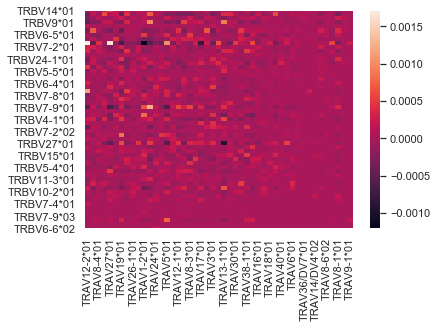

In [68]:
sns.heatmap(data_1)

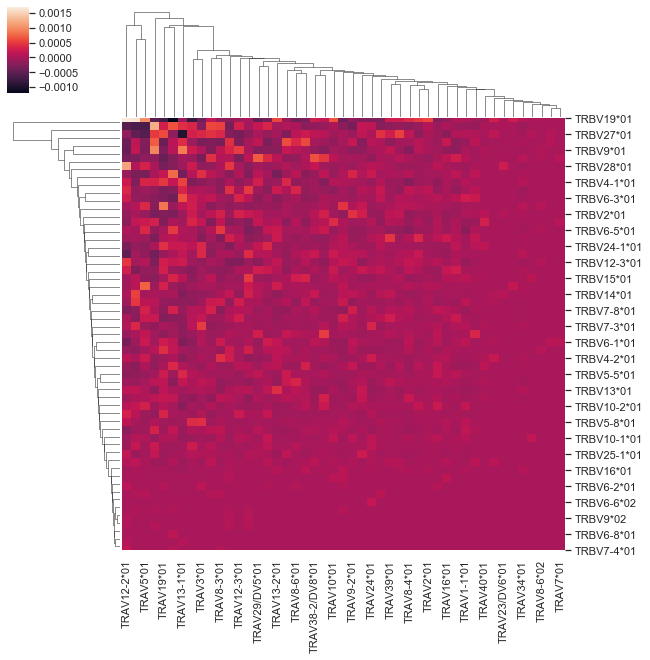

In [86]:
sns.clustermap(data_1)

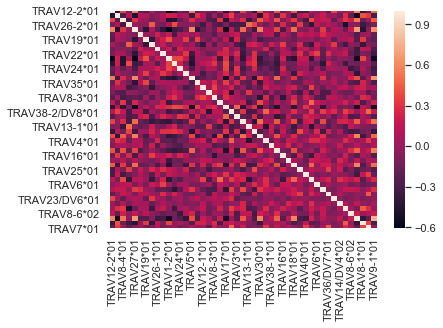

In [69]:
sns.heatmap(d)

In [266]:
dict1=dict()
biggest=0
Genes1=[]
Genes2=[]
Counts=[]
nameV=""
nameJ=""
for PairName in alphaVJ.iteritems():
    
    biggest=int(alphaVJ.max())
    normalized=int(PairName[1])/biggest
    genes12=PairName[0].split("TRAJ")
    nameV=genes12[0]
    nameJ="TRAJ"+genes12[1]
    Genes1.append(nameV)
    Genes2.append(nameJ)
    Counts.append(normalized)
    #dict1={PairName[0]:str(normalized)}
    #print(dict1)    
AlphaVJ_Counts=pd.DataFrame(Counts,index=Genes1, columns=Genes2)
#sns.heatmap(AlphaVJ_Counts)

ValueError: Shape of passed values is (1744, 1), indices imply (1744, 1744)

How often are V and J genes together for each gene (to compare them, probably need to remove TRA and TRB from the beginning)


In [74]:
dict1=dict()
betaIndex=[]
data_betaVJ=[]
for PairName in alphaVJ.iteritems():
    splitted=PairName[0].split("TRA"); pair_name=splitted[1]+"+"+splitted[2]
    dict1={pair_name:PairName[1]}
    data_betaVJ.append(PairName[1])
    betaIndex.append(pair_name)
    #print(dict1)
Beta2=pd.DataFrame(data_betaVJ,index=betaIndex, columns=["Beta"])
#print(Beta2)

dict2=dict()
alphaIndex=[]
data_alphaVJ=[]
for PairName in betaVJ.iteritems():
    splitted=PairName[0].split("TRB"); pair_name=splitted[1]+"+"+splitted[2]
    dict2={pair_name:PairName[1]}
    data_alphaVJ.append(PairName[1])
    alphaIndex.append(pair_name)
    #print(dict2)    
Alpha2=pd.DataFrame(data_alphaVJ,index=alphaIndex, columns=["Alpha"])
#print(Alpha2)

dfAB=pd.concat([Alpha2,Beta2],axis=1,sort=False)

Now I will generate the data to put in the dataframe

In [47]:
complex_list_alpha = list(set(alpha['complex.id']))
complex_list_beta=list(set(beta['complex.id']))
#To create a list with both alpha and beta are present
list1 = complex_list_alpha
list2 = complex_list_beta
list_both = [item for item in list1 if item in list2]

data_alpha=[]
data_beta=[]
for iii in list_both:
    data_alpha.append(alpha.loc[alpha['complex.id']==iii,'V'].iloc[0])
    data_beta.append(beta.loc[beta['complex.id']==iii,'V'].iloc[0])


In [7]:
Alpha=pd.DataFrame(data_alpha,index=list_both, columns=["Alpha"])
Beta=pd.DataFrame(data_beta,index=list_both, columns=["Beta"])

#TR_complex=pd.concat([Alpha,Beta],axis=1)
#TR_complex

,Alpha,Beta
13,TRAV26-2*01,TRBV29-1*01
26,TRAV17*01,TRBV6-5*01
29,TRAV5*01,TRBV29-1*01
47,TRAV5*01,TRBV29-1*01
50,TRAV12-1*01,TRBV24-1*01
...,...,...
24497,TRAV5*01,TRBV20-1*01
24498,TRAV3*01,TRBV12-5*01
24499,TRAV25*01,TRBV7-3*01
24500,TRAV12-3*01,TRBV12-4*01


In [124]:
my_dictA = {i:[data_alpha.count(i)] for i in data_alpha}
my_dictB = {i:[data_beta.count(i)] for i in data_beta}
#my_dict


### IMGT/Gene-DB contains the V genes. The genes are downloaded and V genes are until the position before the Cystein!

In [267]:
import re

infile=open('Vgenes_fasta.txt','r')
outfile=open('Vgenes_fasta_outfile.txt','w')
header=""
line1=""
finalVgene=""

#This will put gene in a line called line1 to make it easier
for line in infile:
    if line.startswith(">"):
        
        if len(line1)>0:
            #print(line1[:104])
            lastChar=line1[:104]
            
            #Check for Functional V genes only and the entries that finish with the Cystein
            if headerTest[3]=="F" and lastChar[-1]=="C":
            
                final_Vgene=lastChar.replace(".","")
                print(header + final_Vgene, file=outfile)     
                #print(header + final_Vgene)
                #print(header)
            line1=""
            header=line.strip()

        else:
            headerTest=line[:-1].split("|")
            header=line.strip() 
            
            
    else:
        
        line1+=line.strip()


To put the J genes in the same line

In [268]:
import re

infile=open('Jgenes_fasta.txt','r')
outfile=open('Jgenes_fasta_outfile','w')
outfile2=open('JgenesAnalysis','w')
header=""
Jgene=""
for line in infile:
    
    if line.startswith('>'):
        if len(header)>0:
            result=re.search("\w+[FW](G.G\w+)$",Jgene)
            if result is not None:
                Jgene_processed=result.group(1)
                print(header +  Jgene_processed, file=outfile)
                #print(Jgene_processed, file=outfile2)
            header=""
            Jgene=""
            header=line.strip()
        else:
            header=line.strip()
    else:    
        Jgene=line.strip()


J-gene

### To create a dict for Jgenes and sequences

In [269]:

infile=open('Jgenes_fasta_outfile','r')

JgenesDict=dict()
spCount=[]
gnCount=[]
Species=dict()
for line in infile:
    line1=line.split("|")
    gene=line1[1]
    specie=line1[2].split("_")[0].lower().replace(" ","")
    sequence=line1[-1].strip()
    
    if specie not in spCount:
        spCount.append(specie)
    if specie not in gnCount:
        gnCount.append(gene)
    
    Species=dict()
    if specie not in JgenesDict.keys():
        if gene not in Species.keys():
            Species[gene]=sequence
            JgenesDict[specie]=Species
        else:
            continue
    else:
        if gene not in Species.keys():
            #Species[gene]=sequence
            JgenesDict[specie][gene]=sequence
        else:
            continue

infile.close()



In [81]:
JgenesDict

{'bostaurus': {'TRAJ1*01': 'GKGTRVSITP',
  'TRAJ10*01': 'GKGTVLLVFP',
  'TRAJ11*01': 'GSGTRLLVRP',
  'TRAJ13*01': 'GSGTMLKVNL',
  'TRAJ14*01': 'GEGTRLIVKL',
  'TRAJ15*01': 'GRGTRLTVQP',
  'TRAJ16*01': 'GSGTTVTVRA',
  'TRAJ17*01': 'GSGTKLRVKP',
  'TRAJ18*01': 'GSGTQLTVVP',
  'TRAJ19*01': 'GQGTELSVKP',
  'TRAJ2*01': 'GKGTQVSIIS',
  'TRAJ20*01': 'GAGTRVVVTP',
  'TRAJ21*01': 'GKGTRLLVKP',
  'TRAJ22*01': 'GDGTALTVKP',
  'TRAJ23*01': 'GKGTKLLVTP',
  'TRAJ24*01': 'GKGTRLAVTP',
  'TRAJ25*01': 'GRGTQLHVLP',
  'TRAJ26*01': 'GTGTQVVVKP',
  'TRAJ27*01': 'GTGTLLSVKP',
  'TRAJ28*01': 'GSGTKLIIKP',
  'TRAJ29*01': 'GAGTRLQVFP',
  'TRAJ3*01': 'GAGTRLSVHP',
  'TRAJ31*01': 'GQGTMLQVKP',
  'TRAJ32*01': 'GLGTSLAVNP',
  'TRAJ33*01': 'GGGTRLMVKP',
  'TRAJ34*01': 'GAGTRLQVLT',
  'TRAJ35*01': 'GQGTSVLVTP',
  'TRAJ36*01': 'GKGTMVSVKP',
  'TRAJ37*01': 'GAGTRLTVKP',
  'TRAJ38*01': 'GTGTRLQVTL',
  'TRAJ39*01': 'GKGTQLIIQP',
  'TRAJ4*01': 'GTGTRLTVHS',
  'TRAJ40*01': 'GTGTRLAVRP',
  'TRAJ41*01': 'GTGTRLTITA',
  'TR

### To create a dict for Vgenes and sequences

In [270]:


infile=open('Vgenes_fasta_outfile.txt','r')

VgenesDict=dict()
spCount=[]
gnCount=[]
Species=dict()

for line in infile:
    
    line1=line.split("|")
    gene=line1[1]
    specie=line1[2].split("_")[0].lower().replace(" ","")
    sequence=line1[-1].strip()
    
    if specie not in spCount:
        spCount.append(specie)
    if gene not in gnCount:
        gnCount.append(gene)

    #"""
    Species=dict()
    if specie not in VgenesDict.keys():
        if gene not in Species.keys():
            Species[gene]=sequence
            VgenesDict[specie]=Species
        else:
            continue
    else:
        if gene not in Species.keys():
            #Species[gene]=sequence
            VgenesDict[specie][gene]=sequence
        else:
            continue
    
    #"""       
infile.close()

 


In [83]:
VgenesDict

{'bostaurus': {'TRAV1*01': 'GKGVKQPTELMAIEGASAQVNCTYQTSGFNGLFWYQQHDGGAPVFLSYNVLDGLETRGHFSSFLRRSDAHSYLLLKELHMKDFASYLC',
  'TRAV10-2*01': 'KNQVEQNPPSLVVLEGENCTFQCNYTVSPFKLRWYTQDTGRGLVSLITMTYSDNKKSNGQYTATVDATAKHSSLHLTAAQLSDPAFYLC',
  'TRAV10-3*01': 'KNQVEQSPPSLVVLEGENCTFQSNYTVRPFNNLRWYTQDTGRGLVSLITMTYSDNKKSNGRYTATLVVTSKHSSLHLTAAQLSNPAFYIC',
  'TRAV11-1*01': 'QYTLDQSPSFLSIQERTHADLNCTYQKKTFYNFVWFKQEPGKGLVSLSLIQSSQKEEADKNFKELLGKEKVYSVLHISASHPGDSATYFC',
  'TRAV12-1*01': 'QNTVEQSPASLPVPEGAAASLGCTYSDSSSQYFAWYRQYPGKGPEFLLYVYANNNKEEGKFTAQSNKTNKHVSLRIRDSEPSDSATYLC',
  'TRAV12-3*01': 'QNTVEQSPASLPVPEGAAASLSCTYSDSNSQYFTWYRQYPGKGPEFLLQVYANNNKEEGKFTVQSNKTNKHVSLRIRDSEPSDSATYLC',
  'TRAV13-1*01': 'GNKVEQSPTLSVQEGNSSVITCTYTDGNSAYFPWYKQEPGKGPQFLIAIRSNKGKEEDQRLTVLLNKTTKRLSLHITTTEAGDSAVYFC',
  'TRAV13-4*01': 'GNKVEQSPTLSVQEGNSTFITCTYTDGNSNYFPWYKQEPGKGPQLLIAIHSNKAKEEDQRLTVLLNKTAKRLSLHIATTEAGDSAVYFC',
  'TRAV14-1*01': 'AQKVTQDQPQVLGQEKEAVTLDCKYDTSDSRYSLFWYKQPSSGGMILLIRQDSSNQQNATEGRYSLNFQKARKSITLVISASQLEHSAVYF

In [271]:
import numpy as np
a=np.unique(spCount)
print(a)

['bostaurus' 'camelusdromedarius' 'canislupusfamiliaris' 'feliscatus'
 'homosapiens' 'macacamulatta' 'musmusculus' 'mustelaputoriusfuro'
 'oryctolaguscuniculus' 'ovisaries' 'tursiopstruncatus']


Now that V and J are in Dicts, tha V can be added before the TRA/TRB of the CDR3, generating the whole sequence

In [85]:


df=df.dropna()
complex_id_list = list(set(df['complex.id']))
TRAlist=[]
TRBlist=[]
not_printed=[]
for i in range(0,len(complex_id_list)-1):
    
    i=int(complex_id_list[i])
    
    if len(df.loc[(df['complex.id']==i)])==2:
        
        TRA=""
        TRB=""
        specie=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'Species'].iloc[0].lower()
        VgeneA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'V'].iloc[0]
        VgeneB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'V'].iloc[0]
        JgeneA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'J'].iloc[0]
        JgeneB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'J'].iloc[0]
        CDRA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'CDR3'].iloc[0]
        CDRB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'CDR3'].iloc[0]
        
        items1=VgeneA,VgeneB
        items2=JgeneA,JgeneB
        if all(i in VgenesDict[specie].keys() for i in items1):
            if all(y in JgenesDict[specie].keys() for y in items2):
               
                VgeneSeqA=VgenesDict[specie][VgeneA]
                VgeneSeqB=VgenesDict[specie][VgeneB]
                JgeneSeqA=JgenesDict[specie][JgeneA]
                JgeneSeqB=JgenesDict[specie][JgeneB]
                
                TRA=VgeneSeqA+CDRA+JgeneSeqA 
                TRB=VgeneSeqB+CDRB+JgeneSeqB
                
                TRAlist.append(TRA)
                TRBlist.append(TRB)

                #print(TRA) #, file=outfile_alpha)
                #print(TRB) #, file=outfile_beta)
                
         
                #print(i,"\t",TRA,"\t",TRB , file=outfile)
                #print(">"+str(i)+"alpha"+"\n"+TRA, file=outfile1)
                #print(">"+str(i)+"beta"+"\n"+TRB, file=outfile2)
            else:
                continue
    else:
        not_printed.append(i)


In [ ]:
complex_id_list = list(set(df['complex.id']))
len(complex_id_list)

In [ ]:
import bcr_models as bcr
import bcr_models.utils
import bcr_models.canonical_structures


hmms = bcr.db.builtin_hmms()
template_db = bcr.db.BuiltinTemplateDatabase()
pdb_db = bcr.db.BuiltinPDBDatabase()


#To construct the whole sequences
outfile=open('Sequences_TCR','w')
outfile1=open('alpha.fasta','w')
outfile2=open('beta.fasta','w')
outfile_alpha=open('TCR_alpha_aligned','w')
outfile_beta=open('TCR_beta_aligned','w')

Err=[]
complex_id_list = list(set(df['complex.id']))
for i in range(0,len(complex_id_list)-1):
    
    i=int(complex_id_list[i])
    
    if len(df.loc[(df['complex.id']==i)])==2:
        
        TRA=""
        TRB=""
        specie=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'Species'].iloc[0].lower()
        VgeneA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'V'].iloc[0]
        VgeneB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'V'].iloc[0]
        JgeneA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'J'].iloc[0]
        JgeneB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'J'].iloc[0]
        CDRA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'CDR3'].iloc[0]
        CDRB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'CDR3'].iloc[0]
        
        items1=VgeneA,VgeneB
        items2=JgeneA,JgeneB
        if all(i in VgenesDict[specie].keys() for i in items1):
            if all(y in JgenesDict[specie].keys() for y in items2):
               
                VgeneSeqA=VgenesDict[specie][VgeneA]
                VgeneSeqB=VgenesDict[specie][VgeneB]
                JgeneSeqA=JgenesDict[specie][JgeneA]
                JgeneSeqB=JgenesDict[specie][JgeneB]
                
                TRA=VgeneSeqA+CDRA+JgeneSeqA 
                TRB=VgeneSeqB+CDRB+JgeneSeqB
                
                Ig_A=bcr.IgChain(TRA,template_db=template_db, pdb_db=pdb_db)
                Ig_B=bcr.IgChain(TRB,template_db=template_db, pdb_db=pdb_db)
                
                try:
                    Ig_A.hmmsearch(*hmms)
                    Ig_B.hmmsearch(*hmms)
                except:
                    Err.append(i)
                    next
                TRA_aligned=Ig_A.aligned_seq
                TRB_aligned=Ig_B.aligned_seq
                
                print(TRA_aligned, file=outfile_alpha)
                print(TRB_aligned, file=outfile_beta)
                
         
                #print(i,"\t",TRA,"\t",TRB , file=outfile)
                print(">"+str(i)+"alpha"+"\n"+TRA, file=outfile1)
                print(">"+str(i)+"beta"+"\n"+TRB, file=outfile2)
            else:
                continue


In [8]:
infile=open('Sequences_TCR','r')
SequencesDf=pd.read_table(infile, sep="\t", names=["complex.id","TRA","TRB"])
TRAseq=SequencesDf.TRA
TRAlength=TRAseq.str.len()
TRAMeanLength=TRAlength.mean()
TRAStdLength=TRAlength.std()
print('The mean of the length of TRA sequences is:',TRAMeanLength)
print('The std of the length of the TRA sequences is:',TRAStdLength)

TRBSequencesDf=pd.read_table(infile, sep="\t", names=["complex.id","TRA","TRB"])
TRBseq=SequencesDf.TRB
TRBlength=TRBseq.str.len()
TRBMeanLength=TRBlength.mean()
TRBStdLength=TRBlength.std()
print('The mean of the length of TRB sequences is:',TRBMeanLength)
print('The std of the length of the TRB sequences is:',TRBStdLength)

The mean of the length of TRA sequences is: 114.9934296977661
The std of the length of the TRA sequences is: 2.4599334470267857
The mean of the length of TRB sequences is: 115.24868421052632
The std of the length of the TRB sequences is: 1.8214064134812136


### TO CALCULATE THE SCORE/EXACT MATCHES BETWEEN SEQUENCES IN THE ALIGNMENT

In [ ]:
Err

In [239]:
infile=open("TCR_alpha_aligned","r+")
#The alignmen
line_count=0
Score=dict()
score_match=0

for line in infile:
    for pos in range(0,len(line)-1):
        position=int(pos)
        
        CDRA=df.loc[(df['complex.id']==i) & (df['Gene']=='TRA'),'CDR3'].iloc[0]
        CDRB=df.loc[(df['complex.id']==i) & (df['Gene']=='TRB'),'CDR3'].iloc[0]
        
        #find CDRA and CDRB in line  
        
        try:
            nextline=next(infile)
        except StopIteration:
            next
        
        if line_count==0:
            print(line[position:position+1],"+",nextline[position:position+1])
            
        aa1=line[position:position+1]
        aa2=nextline[position:position+1]
        if aa1==aa2 and aa1!="-":
            score_match+=1
        
        #if line_count==0:
            #if aa1==aa2:
                #print(score_match)
    Score[line_count]=score_match
    line_count+=1
    score_match=0
    
infile.close()

- + -
- + -
- + -
- + V
T + T
T + T
Q + S
P + P
N + A
S + S
M + M
E + A
S + V
N + Q
E + E
E + G
E + D
P + P
V + V
H + T
L + L
P + D
C + C
N + V
H + Y
S + S
T + T
I + S
S + D
- + -
- + -
- + -
- + -
- + -
- + -
G + A
T + T
D + P
Y + V
I + L
H + V
W + W
Y + Y
R + R
Q + Q
L + Y
- + -
P + P
S + G
Q + G
G + Q
P + P
E + Q
Y + L
V + L
I + V
H + T
G + Y
L + L
- + S
- + -
- + -
- + -
- + -
- + N
T + G
S + E
N + E
V + K
N + S
- + -
N + E
- + -
R + G
M + G
A + L
S + N
L + A
A + T
I + L
- + -
A + Q
- + -
E + -
D + S
R + E
K + K
S + E
S + S
T + S
L + L
I + H
L + I
H + K
R + R
A + S
T + Q
L + G
R + G
D + D
A + A
A + A
V + I
Y + Y
Y + F
C + C
C + C
I + A
L + Y
G + K
S + A
N + G
- + -
- + -
- + -
- + -
- + -
- + -
- + -
- + -
- + -
- + -
D + D
Y + R
K + I
L + L
S + L
F + F
G + G
S + S
G + G
T + T
T + T
V + L
T + T
V + -
- + V
- + P


In [228]:
Score

{0: 39, 1: 35, 2: 29, 3: 28, 4: 41, 5: 41}

Now I will use a code for align so that we can have the sequence ID and then we can cluster by sequence ID

In [208]:
a="----TTQPNSMESNEEEPVHLPCNHSTIS------GTDYIHWYRQL-PSQGPEYVIHGL------TSNVN-N-RMASLAI-A-EDRKSSTLILHRATLRDAAVYYCCILGSN----------DYKLSFGSGTTVTV--"
b="-QQGEENLQALSIHEGENATMNCSYKTA--------IDTLHWYRQD-SRRGFAHLILIRS-----NEREK-LSGRLRVTL-D-NSIKGSSLSITASQAADTATYLCCATDA-----------GNDMRFGAGTRLMVKP"
both=[a,b]
for n in both:
    for pos in range(0,len(n)):
        if n[int(pos):int(pos)+1]=="-":
            print(next(both[int(pos):int(pos)+1]))

TypeError: 'list' object is not an iterator

In [10]:
import numpy

In [11]:
numpy.__path__

['/Users/s182286/opt/anaconda3/envs/myclone/lib/python3.7/site-packages/numpy']

In [8]:
!cp -r /Users/s182286/Library/Python/2.7/lib/python/site-packages/bcr_models* /Users/s182286/opt/anaconda3/lib/python3.7/site-packages/

## To extract the MHC sequences I will extract the longest protein sequence so that I am sure that I take all the nucleotides.


Reorganize MHC and put the sequence together in one line

In [244]:
infile_MHC=open("MHC_prot.fasta","r")
outfile=open("MHC_prot_reorg.fasta","w")

line1=""
for line in infile_MHC:
    if line.startswith(">"):
        if len(line1)>0:
            print(header+line1, file=outfile)
            #print(line1, file=outfile)
            header=""
            line1=""
            header=line
        else:
            header=line
    else:
        line1+=line[:-1]
infile_MHC.close()        
outfile.close()
#print(next(infile_MHC))

put the MHC sequences from the ones that can find

In [272]:
#infile_MHC=open('MHC_prot.fasta','r')
outfile=open("MHCseq1","w")
MHC_list=df.iloc[:,6].unique()
myMHC=dict()
MHC_not_present=[]

#ADD THE MHC_MODIFIED to MHC list so that it searches for the name search

for i in MHC_list:
#for i in ['HLA-A*02:01','HLA-B*07:02']:
    s=i.split("-")
    MHCname=s[1]
    
    longest=0

    #infile_MHC=open('MHC_prot.fasta','r')
    infile_MHC_reorg=open("MHC_prot_reorg.fasta","r")
    #Check for the longest for each MHC
    MHCseq=""
    for line in infile_MHC_reorg:
        
        if MHCname in line:
            line1=line.split(" ")
            if int(line1[2])>longest:
                longest=int(line1[2])
                if longest>0:
                    MHCseq=next(infile_MHC_reorg)    
                    if MHCname not in my_MHC:
                        myMHC[MHCname]=MHCseq
                    else:
                        continue
                    print(">",MHCname,"\n",MHCseq, file=outfile)
                else:
                    MHCseq=""

    if MHCseq =="":
         MHC_not_present.append(MHCname)
    '''
    print(">",MHCname, longest)
    print(MHCseq)
    '''

                #print(toFind)
    #infile_MHC.close()
    infile_MHC_reorg.close()


For those that cannot be found, split the name and search for a shorter part of the name. Create MHC modified list, and search those names.

In [246]:
$len(MHC_list)

38

In [248]:
MHC_modified=[]
for strin in MHC_not_present:
    try:
        stri=strin.split(":")
        MHCname1=stri[0]+":"+stri[1]
        if MHCname1 not in MHC_modified: 
            MHC_modified.append(MHCname1)
        else:
            continue
    except: 
        print(strin, "cannot be modified")
MHC_modified

2Aa cannot be modified
2Kb cannot be modified
2Db cannot be modified
2Eb1 cannot be modified
2KB cannot be modified


['A*02:01',
 'B*08:01',
 'A*02:256',
 'B*35:08',
 'E*01:01',
 'B*35:42',
 'B*57:06',
 'B*44:05',
 'A*24:02',
 'B*27:05',
 'B*51:193',
 'DQA1*05:01']

In [275]:
#For the MHC names that need to be modified to be found
outfile=open("MHCseq2","w")
for i in MHC_modified:
    
    MHCname=i
    
    longest=0

    #infile_MHC=open('MHC_prot.fasta','r')
    infile_MHC_reorg=open("MHC_prot_reorg.fasta","r")
    #Check for the longest for each MHC
    MHCseq=""
    for line in infile_MHC_reorg:
        
        if MHCname in line:
            line1=line.split(" ")
            if int(line1[2])>longest:
                longest=int(line1[2])
                if longest>0:
                    MHCseq=next(infile_MHC_reorg)
                    if MHCname not in my_MHC:
                        myMHC[MHCname]=MHCseq
                    else:
                        continue
                    print(">",MHCname,"\n",MHCseq, file=outfile)
                else:
                    MHCseq=""
    infile_MHC_reorg.close()
                    
    """
    print(">",MHCname, longest)
    print(MHCseq)
    """
 
        

In [280]:
38-len(myMHC)

19

In [281]:
myMHC.keys()

dict_keys(['A*02:01', 'B*07:02', 'DRA*01:02:03', 'DRA*01:01:02', 'DQA1*03:01:01', 'A*02', 'B*51:01', 'B*35:01', 'B*08', 'B*08:01', 'A*11:01', 'A*03:01', 'B*07', 'A*11', 'B*12', 'A*01:01', 'E*01:01', 'B*27:05', 'DQA1*05:01'])

In [187]:
strin='HLA-A*02:01'
stri=strin.split("-")
newS=stri[1]
newSt=newS.split(":")
MHCname1=newSt[0]+":"+newSt[1]
MHCname1

'A*02:01'

In [268]:
print(MHC_list)
len(MHC_list)

['HLA-A*02:01' 'HLA-B*07:02' 'HLA-A*02:01:59' 'HLA-A*02:01:48' 'H-2Aa'
 'H-2Kb' 'HLA-DRA*01:02:03' 'HLA-B*08:01:29' 'HLA-A*02:256'
 'HLA-B*35:08:01' 'HLA-E*01:01:01:03' 'HLA-DRA*01:01:02' 'HLA-B*35:42:01'
 'HLA-B*57:06' 'HLA-B*44:05:01' 'HLA-A*02:01:98' 'H-2Db' 'H-2Eb1'
 'HLA-A*24:02:84' 'HLA-B*27:05:31' 'HLA-DQA1*03:01:01' 'HLA-B*51:193'
 'HLA-DQA1*05:01:01:02' 'HLA-A*02:01:110' 'HLA-A*02' 'HLA-B*51:01'
 'HLA-B*35:01' 'HLA-B*08' 'HLA-B*08:01' 'HLA-A*11:01' 'HLA-A*03:01'
 'HLA-B*07' 'HLA-B*35:08' 'HLA-B*44:05' 'HLA-A*11' 'HLA-B*12'
 'HLA-A*01:01' 'H-2KB']


38